<a href="https://colab.research.google.com/github/leesochang/Deeplearning2020/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0_hello_xor_tensorflow_20142224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XOR 이해하기

In [68]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [69]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
#XOR
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [70]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

* 안되는 네트워크 구조 예제. 되도록 고쳐봅시다. 

In [71]:
#W = tf.Variable(tf.random_normal([2, 1]), name='weight')
#b = tf.Variable(tf.random_normal([1]), name='bias')
#hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [72]:
W = tf.Variable(tf.random_normal([2, 2]), name='weight') #2개의 노드
b = tf.Variable(tf.random_normal([2]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

#W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
#b2 = tf.Variable(tf.random_normal([1]), name='bias2')
#hypothesis = tf.sigmoid(tf.matmul(X, W2) + b2)

In [73]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [74]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [75]:
sess = tf.Session()

In [76]:
sess.run(tf.global_variables_initializer())

In [77]:
vcost =[]

In [78]:
for step in range(10001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

0.81944203
0.7139952
0.6973363
0.693591
0.69315845
0.6931472
0.6931472
0.6931472
0.6931472
0.6931472
0.6931472


Text(0.5, 0, 'epoch')

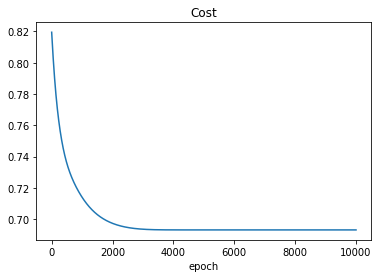

In [79]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [80]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,0]]})

In [81]:
print(test1[0][0])

0.50000006


In [82]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [83]:
print(test1[0][0])

0.50000006


In [84]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict = {X:[x_data[i]]})
  print(i, x_data[i], y_data[i], '---- predicted : ', test1)

0 [0. 0.] [0.] ---- predicted :  [[0.50000006 0.50000006]]
1 [0. 1.] [1.] ---- predicted :  [[0.5        0.50000006]]
2 [1. 0.] [1.] ---- predicted :  [[0.50000006 0.5       ]]
3 [1. 1.] [0.] ---- predicted :  [[0.5 0.5]]


In [85]:
sess.run(accuracy, feed_dict = {X: x_data, Y: y_data})

0.5